In [ ]:
import pandas as pd

In [ ]:
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"
df = pd.read_json(url)

df_internet = pd.json_normalize(df['internet'])

df_total = pd.json_normalize(df['account'])

cuentas_diarias = pd.DataFrame({'Charges.Monthly': df_total['Charges.Monthly']})
cuentas_diarias.reset_index(drop=True, inplace=True)

df.head()



,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [ ]:
df['Churn'].replace({'Yes': 1, 'No': 0, '':0}, inplace=True)

df['Churn'].describe()

/tmp/ipython-input-1364714258.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Churn'].replace({'Yes': 1, 'No': 0, '':0}, inplace=True)
/tmp/ipython-input-1364714258.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Churn'].replace({'Yes': 1, 'No': 0, '':0}, inplace=True)


,Churn
count,7267.000000
mean,0.257190
std,0.437115
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [ ]:
si = 0
no = 0

for i,n in enumerate(df['Churn']):
  if n == 0:
    no += 1
  else:
    si += 1

total = si + no
print("Dejaron la empresa: " + str(si) + ", No dejaron la empresa: " + str(no) + ', Total: ' + str(total) )

Dejaron la empresa: 1869, No dejaron la empresa: 5398, Total: 7267


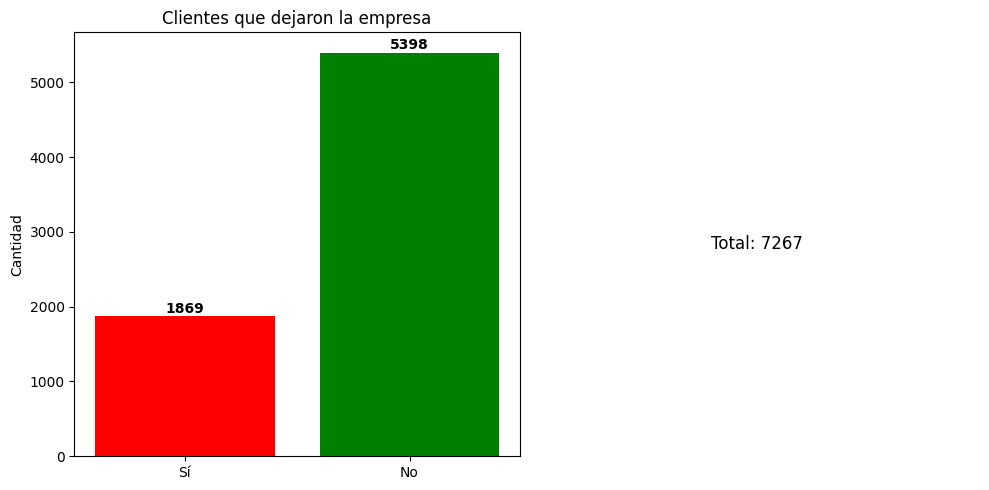

In [ ]:
import matplotlib.pyplot as plt

fig, axis = plt.subplots(1,2, figsize=(10,5))

# Datos para el gráfico
labels = ['Sí', 'No']
values = [si, no]
colors = ['red', 'green']

# Gráfico de barras
bars = axis[0].bar(labels, values, color=colors)
axis[0].set_title('Clientes que dejaron la empresa')
axis[0].set_ylabel('Cantidad')

# Agregar texto encima de cada barra
for bar in bars:
    height = bar.get_height()
    axis[0].text(bar.get_x() + bar.get_width() / 2, height + 1, str(height),
                 ha='center', va='bottom', fontsize=10, fontweight='bold')

# Puedes dejar el segundo subplot vacío o agregar otro gráfico
axis[1].text(0.5, 0.5, f'Total: {total}', ha='center', va='center', fontsize=12)
axis[1].axis('off')  # Oculta ejes del segundo subplot

plt.tight_layout()
plt.show()

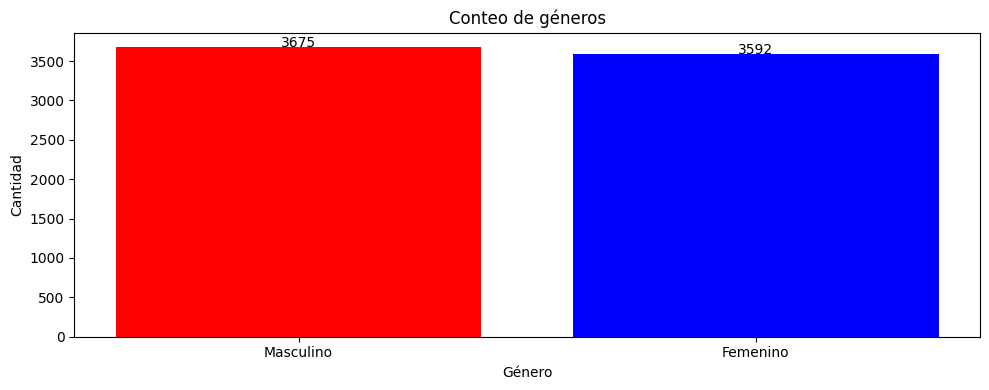

In [ ]:
# Se extrae el genero
customer = pd.json_normalize(df['customer'])
genero = customer['gender']

femenino = 0
masculino = 0

for n in genero:
    if n == 'Female':
        femenino += 1
    else:
        masculino += 1

# Gráfico
fig, axis = plt.subplots(figsize=(10, 4))
axis.bar(['Masculino', 'Femenino'], [masculino, femenino], color=['red', 'blue'])

axis.set_title('Conteo de géneros')
axis.set_ylabel('Cantidad')
axis.set_xlabel('Género')

# Añadir etiquetas de número sobre cada barra
for i, valor in enumerate([masculino, femenino]):
    axis.text(i, valor + 1, str(valor), ha='center')

plt.tight_layout()
plt.show()


Años: 1519, Mes: 4005, Dos años: 1743


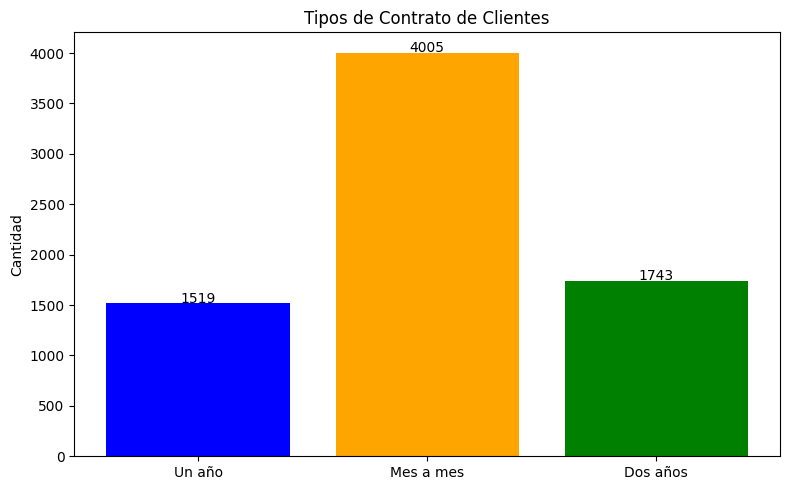

In [ ]:
from io import TextIOWrapper
# Se extrae el tipo de contrato
contratos = pd.json_normalize(df['account'])
tipo_contrato = contratos['Contract']
tipo_contrato.unique()

year = 0
month = 0
two_year = 0

for n in tipo_contrato:
  if n == 'One year':
    year += 1
  elif n == 'Month-to-month':
    month += 1
  else:
    two_year += 1


print(f"Años: {year}, Mes: {month}, Dos años: {two_year}"  )

# Crear figura y eje
fig, axis = plt.subplots(figsize=(8, 5))

# Datos para el gráfico
etiquetas = ['Un año', 'Mes a mes', 'Dos años']
valores = [year, month, two_year]

# Gráfico de barras
axis.bar(etiquetas, valores, color=['blue', 'orange', 'green'])

# Títulos y etiquetas
axis.set_title('Tipos de Contrato de Clientes')
axis.set_ylabel('Cantidad')

# Añadir valores encima de las barras
for i, valor in enumerate(valores):
    axis.text(i, valor + 1, str(valor), ha='center')

plt.tight_layout()
plt.show()


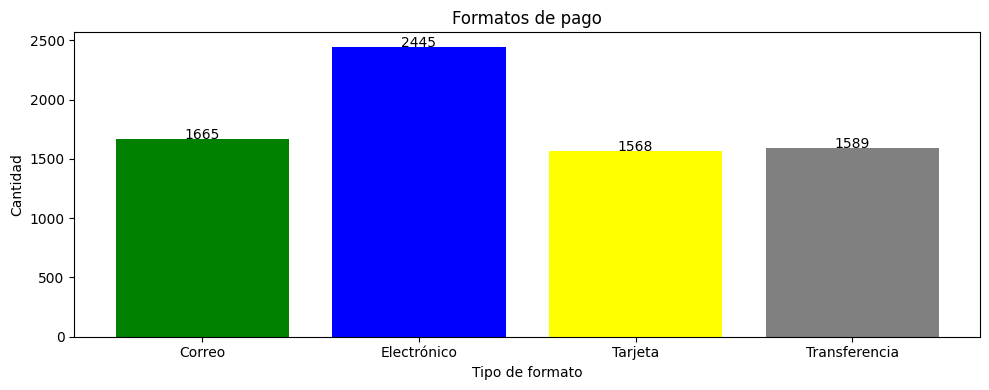

In [ ]:
# Se extrae la forma de pago
# Limpiar el texto eliminando la palabra " (automatic)" en cada fila
forma_pago = contratos['PaymentMethod'].str.replace(" \(automatic\)", "", regex=True)
forma_pago.unique()
correo = 0
electronico = 0
tarjeta = 0
transferencia = 0

# Mostrar los primeros 10 resultados
for n in forma_pago:
  if n == 'Mailed check':
    correo += 1
  elif n == 'Electronic check':
    electronico += 1
  elif n == 'Credit card':
    tarjeta += 1
  else:
    transferencia += 1


labels_pagos = ['Correo', 'Electrónico', 'Tarjeta', 'Transferencia']
numeros_pagos = [correo, electronico, tarjeta, transferencia]
colores = ['green', 'blue', 'yellow', 'grey']

fig, axis = plt.subplots(figsize=(10, 4))
axis.bar(labels_pagos, numeros_pagos, color=colores)

axis.set_title('Formatos de pago')
axis.set_ylabel('Cantidad')
axis.set_xlabel('Tipo de formato')

# Añadir valores arriba de las barras
for i, valor in enumerate(numeros_pagos):
    axis.text(i, valor + 1, str(valor), ha='center')

plt.tight_layout()
plt.show()


# 📊 Informe Final del Análisis de Evasión de Clientes (Churn)

---

## 🔹 Introducción

El objetivo de este análisis es entender las causas detrás de la evasión de clientes (churn) en una empresa de telecomunicaciones.  
A través del uso de Python y sus principales librerías para análisis de datos, buscamos identificar patrones en el comportamiento de los usuarios que abandonan los servicios ofrecidos.

Este análisis tiene como finalidad apoyar la toma de decisiones estratégicas que mejoren la retención de clientes y optimicen la experiencia del usuario.

---

## 🔹 Limpieza y Tratamiento de Datos

Se realizaron los siguientes pasos para preparar los datos:

- 📥 **Importación** del archivo JSON original con los datos de clientes.
- 🧹 **Limpieza de datos**:
  - Eliminación de valores nulos o inconsistentes.
  - Conversión de datos categóricos y numéricos.
- 🧾 **Transformación** de columnas para facilitar el análisis (por ejemplo: transformación de variables booleanas, creación de nuevas variables si es necesario).
- 📊 **Estandarización** de los datos para su visualización (normalización, codificación, etc.).

---

## 🔹 Análisis Exploratorio de Datos (EDA)

Se realizaron diversos análisis y visualizaciones para descubrir patrones ocultos en los datos. Entre los principales gráficos se encuentran:

- ✅ Distribución de clientes por **género** y **tipo de contrato**.
- 💳 Relación entre **forma de pago** y evasión.
- 📈 Comparación entre clientes activos y clientes que han abandonado el servicio.
- 🔍 Detección de variables que podrían influir en la evasión, como:
  - Tenencia de servicios adicionales
  - Duración del contrato
  - Facturación mensual


---

## 🔹 Conclusiones e Insights

A partir del análisis realizado, se obtuvieron los siguientes hallazgos clave:

- 🔹 Los clientes con **contratos mensuales** presentan una tasa de evasión significativamente más alta que aquellos con contratos a largo plazo.
- 🔹 Aquellos que pagan mediante **tarjetas de crédito o transferencias automáticas** tienden a permanecer más tiempo como clientes.
- 🔹 El **género** no parece ser un factor determinante en la evasión.
- 🔹 El servicio de **seguridad en línea** parece estar vinculado a una mayor retención.

---

## 🔹 Recomendaciones

Basado en los hallazgos anteriores, se proponen las siguientes estrategias para reducir la evasión de clientes:

- 💼 **Incentivar contratos a largo plazo**, ofreciendo beneficios adicionales por fidelidad.
- 🧾 **Promover métodos de pago automáticos** mediante descuentos u ofertas especiales.
- 📢 **Campañas personalizadas** para clientes con mayor riesgo de abandono (contratos mensuales, servicios mínimos, etc.).
- 🧠 **Mejorar servicios complementarios** como seguridad en línea, soporte técnico y almacenamiento en la nube.
- 📊 Implementar un sistema de seguimiento continuo para identificar tendencias tempranas de churn.

---

## 🚀 Cierre

Este análisis demuestra cómo el uso de Python, junto con técnicas de ciencia de datos, puede aportar valor estratégico en la toma de decisiones empresariales.  
La correcta interpretación de los datos permite anticiparse al comportamiento del cliente y diseñar mejores experiencias que favorezcan la retención y la satisfacción.

